# <center> Pandas

В классическом машинном обучении зачастую программисты и исследователи работают с табличными данными, хранящимися в форматах: .csv, .tsv, .xlsx. Для того, чтобы обрабатывать хранящуюся в файлах информацию и приводить данные к желаемому виду (добавление и удаление объектов из выборки, нормировка, приведение характеристик к требуемому типу и тд) сущетсвует библиотека `Pandas`.
<br><br>
В `Pandas` для хранения данных из таблицы существует две сущности: Series и DataFrame. Series предназначен для хранения столбца таблицы, данные в котором имеют одинаковый тип (int, float, str, object). DataFrame же состоит из множества Series-ов (столбцов). Будет проще понять на примере.
<br><br>
Представим, что мы хотим научиться предсказывать наличие сердечно-сосудистых заболеваний по таким признакам как: возраст, рост, вес, верхнее артериальное давление, нижнее и город проживания (климат и условия жизни также ялвяются значимыми факторами). Тогда бы наша таблица имела следующий вид:

<br>
<img width=60% src='img/table.png'>

Строки в табличных данных называют **объектами**, а столбцы называют **характеристиками**. В данном случае объектами являются люди, а характеристиками их биометрические показатели. **Целевой вектор** - это та характеристика, которую мы хотели бы научиться предсказывать, основываясь на остальных. 

На этом теория Перейдем к настоящим данным и познакомимся с основным функционалом данной библиотеки.

In [32]:
%matplotlib inline

# импортируем библиотеку pandas и сопоставим ей устоявшийся alias - 'pd'
import pandas as pd

# прочитаем .csv файл с данными о больных сердечно-сосудистыми заболеваниями
# - в параметр 'index_col' следует передать тот столбец, который хранит индекс записи
# - в параметр 'sep' следует передать символ, которым разделены записи в .csv файле
df = pd.read_csv('./data/cardio.csv', index_col='id', sep=';')

# теперь мы храним таблицу с данными в виде экземпляра класса *DataFrame* в переменной *df* !

<br><br>
---
## Просмотр таблицы

**Выведем первые пять записей таблицы** с помощью метода 'head'

In [2]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Выведем последние пять записей таблицы**

In [3]:
df.tail() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


**Выведем информацию о столбцах таблицы**: кол-во записей, кол-во НЕпустых значений в столбце (тех, в которых не указано *None*), тип столбца

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


Видим, что всего 70к записей и в каждом столбце 70k непустых значений.

**Выведем характеристики** каждого столбца (кол-во записей, среднее значение, дисперсия, максимальное и минимальное значения, квантили)

In [5]:
df.describe() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<br><br>
---
## Выделение отдельных столбцов/строк (индексация)

Чтобы **выделить отдельный столбец данных**, требуется обратиться к нему по имени, указав имя в квадратных скобках.
<br>
Выделим столбец 'age' и выведем первые две записи столбца.

In [6]:
df['age'].head(2)

id
0    18393
1    20228
Name: age, dtype: int64

Можно также сохранить столбец в отдельную переменную

In [7]:
a = df['age']

Теперь в переменной '`a`' тоже хранится столбец '`age`'. 
<br>
Выведем тип этой переменной и ожидаем увидеть '`pandas.core.series.Series`' (вы ведь помните, что DataFrame хранит Series-ы, а каждый Series хранит в себе столбец таблицы)

In [8]:
type(a)

pandas.core.series.Series

Если мы хотим **выделить несколько столбцов**, то потребуется указать их в дополнительных квадратных скобках через запятую

In [9]:
df[['age', 'height', 'weight']].head(5)

,age,height,weight
id,,,
0,18393,168,62.0
1,20228,156,85.0
2,18857,165,64.0
3,17623,169,82.0
4,17474,156,56.0


Чтобы **выделить все столбцы *кроме* указанных**, требуется использовать метод '`drop`', указав какие столбцы вы желаете отбросить. <font color='red'>Обратите внимание</font>, что для того, чтобы удалить столбцы также потребуется указать параметр <font color='red'>axis=1</font>).

In [10]:
df.drop(['age', 'height', 'cardio'], axis=1).head() 

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,
0,2,62.0,110,80,1,1,0,0,1
1,1,85.0,140,90,3,1,0,0,1
2,1,64.0,130,70,3,1,0,0,0
3,2,82.0,150,100,1,1,0,0,1
4,1,56.0,100,60,1,1,0,0,0


Чтобы **выделить все строки *кроме* указанных** также можно использовать метод '`drop`', только на этот раз указав параметр <font color='red'>axis=0</font>

In [11]:
df.drop([0, 1, 2], axis=0).head() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1


Чтобы **выделить строку** в таблице (то есть объект), можно у свойства iloc указать в квадратных скобках индекс строки.
<br>
Выведем 17-ую запись в таблице.

In [12]:
df.iloc[17]

age            16747.0
gender             1.0
height           158.0
weight            52.0
ap_hi            110.0
ap_lo             70.0
cholesterol        1.0
gluc               3.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
Name: 27, dtype: float64

Чтобы **выделить несколько строк** также можно использовать метод '`.iloc()`', только в виде параметра следует передать массив номеров строк, которые хотите выделить из таблицы.

In [13]:
# выведем строки номер 1, 2 и 3
df.iloc[[1, 2, 3]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1


In [14]:
# выведем строки с 5 по 11(не включительно)
df.iloc[5:11] # до двоеточия указываем "с какого номера" выделить, после двоеточия "до какого"(не включительно)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0
14,19834,1,164,68.0,110,60,1,1,0,0,0,0
15,22530,1,169,80.0,120,80,1,1,0,0,1,0


Также в *pandas* существует **логическая индексация**. Предположим вы хотите выделить из таблицы только те объекты, у которых в характеристике *active* стоит 1 (то есть людей, ведущих активный образ жизни). 
<br><br>
Делается это следующим образом:
<br>
 1) Получаем бинарную маску-вектор, то есть вектор состоящий из значений True и False.
<br>
 2) Указываем при индексации этот вектор, вместо номеров строк. 

In [15]:
# выведем первую пятерку активных пациентов при помощи логической индексации и метода .head()
df[df['active'] == 1].head() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1


In [16]:
# можем также узнать средний рост курящих, например
df[df['smoke'] == 1]['height'].mean() 

169.323877451775

In [17]:
# интересно, правда ли курящие люди меньше ростом? сравним с некурящими
df[df['smoke'] == 0]['height'].mean() 

163.87941595776346

<br><br>
---
## Применение функций к столбцам таблицы

**Чтобы произвести операцию над всеми элементами столбца** следует использовать метод '`apply`', передав в качестве параметра функцию, которую мы хотим применить к каждому элементу столбца.

In [18]:
def days_to_years(days):
    """
    Переводит возраст в днях в возраст в годах.
    
    Параметры:
    ----------
    - days: int
        возраст в годах
        
    Возвращает:
    ----------
    - years: int
        возраст в годах
    """
    years = days // 365 # напомним, что операция "//" - целочисленное деление (возвращает int)
    return years

# применим только что созданную функцию к каждому элементу столбца, сохранив результат в переменную 'a'
a = df['age'].apply(days_to_years)

# выведем первые три записи (видим что теперь возраст не в цифрах, а в годах)
a.head(3)

id
0    50
1    55
2    51
Name: age, dtype: int64

<br>
Посмотрим и убедимся, что мы никак не изменили данные в нашей таблице (так как <font color='red'>метод 'apply' не изменяет исходные данные</font>, а создает копию столбца и только потом применяет функцию к копии)

In [19]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


Чтобы внести изменения в наш дата фрейм (нашу таблицу) требуется добавить в него новый столбец или перезаписать старый

<br><br>
---
## Удаление и добавление столбцов

Как мы заметили возраст до сих пор отображается в днях. Это произошло по той причине, что метод '`apply`' не меняет данные в столбце, а ВОЗВРАЩАЕТ копию столбца, с примененной к нему функцией!
<br><br>
**Добавить новый столбец** 'возраст в годах' можно следующим образом

In [20]:
df['age_in_years'] = df['age'].apply(days_to_years)

# где 'age_in_years' - название, которое мы дадим новому столбцу

Посмотрим, появился ли новый столбец в данных

In [21]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


Отлично! Теперь **удалим столбец** '`age`', в котором возраст хранился в днях при помощи знакомого метода '`drop`', указав параметры '`axis=1`', который явно укажет что удаляем именно столбец, а не строку и '`inplace=True`', чтобы удалить столбец в таблице '`df`'.

In [22]:
df.drop(['age'], axis=1, inplace=True)

Посмотрим как теперь выглядит наша таблица

In [23]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
id,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47


Производить алгебраические операции над столбцами можно и проще, например перевести рост из *см* в *м*, можно в одну строку. Без удаления столбца.

In [24]:
df['height'] = df['height'] / 100

# сразу выведем первые пять записей и посмотрим как изменился вид данных в таблице
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
id,,,,,,,,,,,,
0,2,1.68,62.0,110,80,1,1,0,0,1,0,50
1,1,1.56,85.0,140,90,3,1,0,0,1,1,55
2,1,1.65,64.0,130,70,3,1,0,0,0,1,51
3,2,1.69,82.0,150,100,1,1,0,0,1,1,48
4,1,1.56,56.0,100,60,1,1,0,0,0,0,47


Если требуется произвести рассчеты с информацией из разных столбцов, то также можно оперировать целыми столбцами при вычислениях. Например, требуется рассчитать индекс массы человека, который рассчитывается по формуле: $$I={\frac  {m}{h^{2}}}$$, где m - вес в кг, h - рост в метрах. Тогда в одну строку можно уместить вычисления и добавление нового столбца.

In [25]:
df['BMI'] = df['weight'] / (df['height']**2)

Посмотрим что получилось

In [26]:
df.head(5)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
id,,,,,,,,,,,,,
0,2,1.68,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,1.56,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,1.65,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,1.69,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,1.56,56.0,100,60,1,1,0,0,0,0,47,23.011177


<br><br>
---
## Статистика

Для того, чтобы узнать среднее значение в каком то столбце, следует выделить желаемый столбец, а после применить к нему метод .mean(). Чтобы узнать максимальное значение существует метод .max(), а для минимального .min()

In [27]:
# средний вес в дата сете
print(df['weight'].mean())

# максимальный вес в дата сете
print(df['weight'].max())

# минимальный вес в дата сете
print(df['weight'].min()) 

# суммарно вес всех людей в дата сете
print(df['weight'].sum()) 

74.20569
200.0
10.0
5194398.3


Посчитать сколько раз определенное значение встречается в столбце можно при помощи методы .value_count(), добавив после вызова метода в квадратных скобках значение, которое нас интересует.

In [28]:
# узнаем у скольких людей верхнее артериальное давление равно 140
df['ap_hi'].value_counts()[140]

9506

In [29]:
# хитрый способ на основе знания что в питоне 
# n * True = n
(df['ap_hi'] == 140).sum() 

9506

In [30]:
# узнаем у скольких людей верхнее артериальное давление больше 140
(df['ap_hi'] > 140).sum() 

9895

<br><br>
---
## Визуализация

Познакомимся с таким типо графиков как "ящик с усами". Название он получил из-за своего вида. 

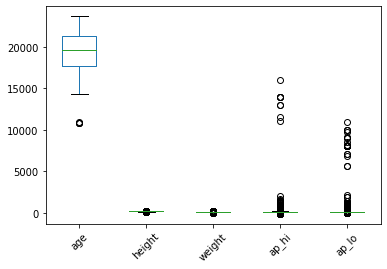

In [38]:
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].plot(kind='box', rot=45)

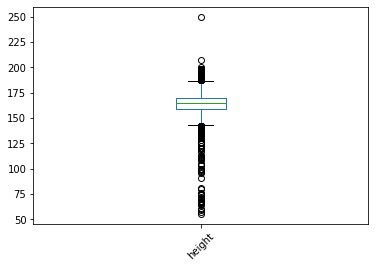

In [52]:
df['height'].plot(kind='box', rot=45)

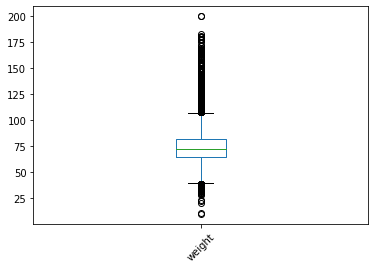

In [53]:
df['weight'].plot(kind='box', rot=45)

Чтобы определить квантили, можно воспользоваться методом .quantile(). Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

In [46]:
q_high = df["ap_hi"].quantile(0.99)
q_low = df["ap_hi"].quantile(0.01)

q_low, q_high

(90.0, 180.0)